In [252]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [253]:
d1 = pd.read_csv('bank/bank-full.csv', sep=';')
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [254]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 1. Check missing values

In [255]:
d1 = d1.replace("unknown", np.nan)
d1 = d1.drop(columns='poutcome')

In [256]:
## Check missing values
d1.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
y                0
dtype: int64

In [257]:
d1_testing = d1[d1.isnull().any(axis=1)]
d1_training = d1[d1.notnull().all(axis=1)]

In [258]:
print("Unique values in each categorical column:\n")
for col in d1_training.select_dtypes(include=[object]):
    print(col+':', d1_training[col].unique())

Unique values in each categorical column:

job: ['management' 'blue-collar' 'technician' 'services' 'admin.' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'student']
marital: ['single' 'married' 'divorced']
education: ['secondary' 'primary' 'tertiary']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'telephone']
month: ['jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'may' 'jun' 'sep']
y: ['no' 'yes']


In [259]:
def binay_col(df, col_name):
    churn_train2 = df.copy() 
    churn_train2[col_name] = (churn_train2[col_name] == 'yes').astype('int64')
#     churn_train2.drop(columns=[col_name], inplace=True)
    return churn_train2
for col_name in ['default', 'housing', 'loan']:
    d1_training = binay_col(d1_training, col_name)
    d1_testing = binay_col(d1_testing, col_name)
    

In [260]:
d1_testing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,no
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45136,53,self-employed,married,tertiary,0,730,1,0,NaN,2,nov,18,1,368,2,no
45141,77,NaN,married,NaN,0,397,0,0,telephone,8,nov,207,1,185,3,no
45150,65,management,married,NaN,0,2352,0,0,cellular,8,nov,354,3,188,13,no
45158,34,student,single,NaN,0,2321,0,0,cellular,9,nov,600,2,99,5,no


In [261]:
## predict null values in columns: job, education, contact
null_columns = ['job','education', 'contact']
X = d1_training.drop(columns = null_columns).drop(columns = 'y')
y = d1_training[null_columns]
X_test = d1_testing.drop(columns = null_columns).drop(columns = 'y')
y_test = d1_testing[null_columns]

In [262]:
X_train_transformed = pd.get_dummies(X, columns=X.select_dtypes(include=['object']).columns) 
X_test_transformed = pd.get_dummies(X_test, columns=X_test.select_dtypes(include=['object']).columns) 
X_test_transformed

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45136,53,0,730,1,0,2,18,1,368,2,...,0,0,0,0,0,0,0,1,0,0
45141,77,0,397,0,0,8,207,1,185,3,...,0,0,0,0,0,0,0,1,0,0
45150,65,0,2352,0,0,8,354,3,188,13,...,0,0,0,0,0,0,0,1,0,0
45158,34,0,2321,0,0,9,600,2,99,5,...,0,0,0,0,0,0,0,1,0,0


In [263]:
y_test.isna().sum()

job            288
education     1857
contact      13020
dtype: int64

In [237]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_transformed, y)

RandomForestClassifier()

In [264]:
prediction = model.predict(X_test_transformed)
prediction

array([['blue-collar', 'secondary', 'cellular'],
       ['management', 'secondary', 'cellular'],
       ['admin.', 'secondary', 'cellular'],
       ...,
       ['retired', 'secondary', 'telephone'],
       ['management', 'tertiary', 'cellular'],
       ['management', 'secondary', 'cellular']], dtype=object)

In [265]:
## this is the original data with missing values
y_test.values

array([['management', 'tertiary', nan],
       ['technician', 'secondary', nan],
       ['entrepreneur', 'secondary', nan],
       ...,
       ['management', nan, 'cellular'],
       ['student', nan, 'cellular'],
       [nan, nan, 'cellular']], dtype=object)

In [271]:
type(y_test.values[0][2]) == float

True

In [272]:
for j in range(0, len(y_test.values)):
    item = y_test.values[j]
    for i in range(0, len(item)):
        if type(item[i]) == float:
            item[i] = prediction[j][i]

In [273]:
y_test.values

array([['management', 'tertiary', 'cellular'],
       ['technician', 'secondary', 'cellular'],
       ['entrepreneur', 'secondary', 'cellular'],
       ...,
       ['management', 'secondary', 'cellular'],
       ['student', 'tertiary', 'cellular'],
       ['management', 'secondary', 'cellular']], dtype=object)

In [274]:
d1_testing[null_columns] = y_test
df = pd.concat([d1_testing, d1_training])
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [276]:
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no


#### There is no missing value in the dataframe.

## 2. Unique values for category variables

In [243]:
print("Unique values in each categorical column:\n")
for col in d1.select_dtypes(include=[object]):
    print(col+':', d1[col].unique())

Unique values in each categorical column:

job: ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' nan 'primary']
default: ['no' 'yes']
housing: ['yes' 'no']
loan: ['no' 'yes']
contact: [nan 'cellular' 'telephone']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
y: ['no' 'yes']


In [244]:
d1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


## 3. Detect and remove outliers

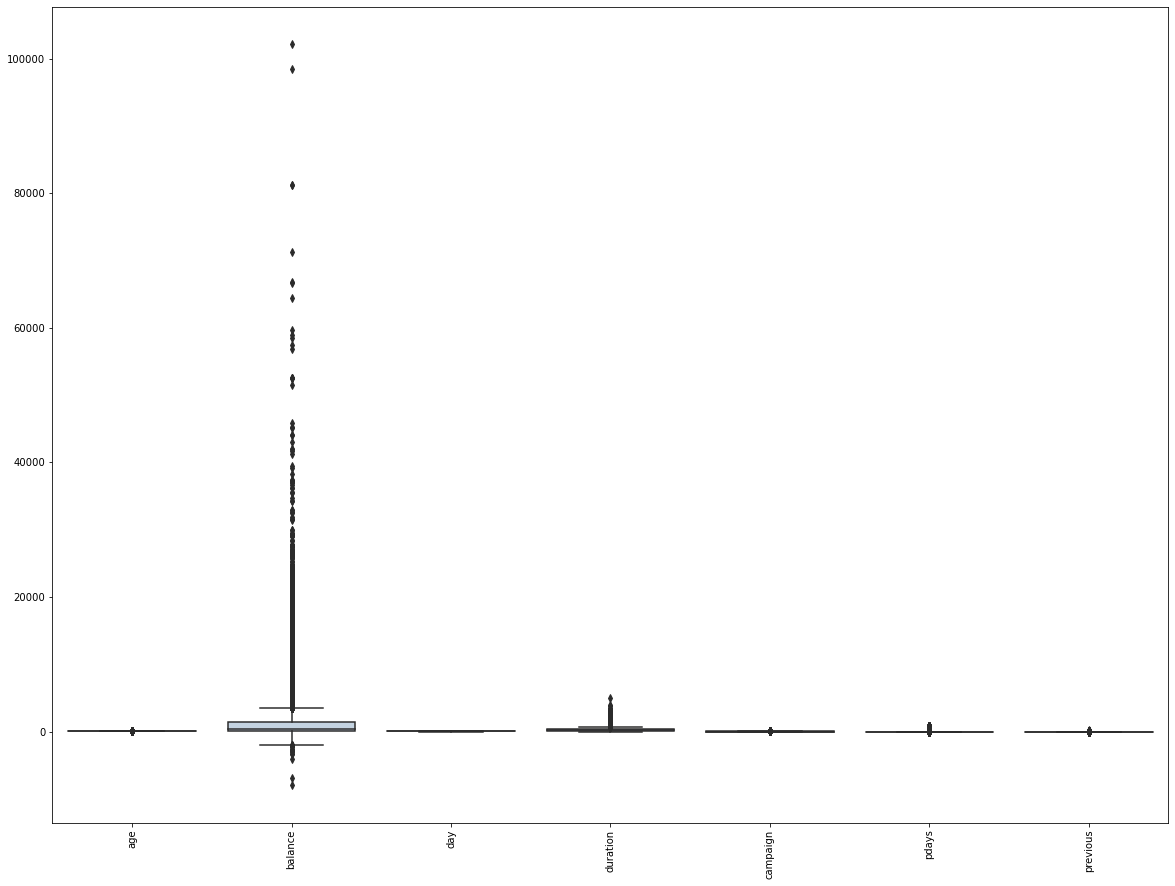

In [245]:
#outliers values
plt.figure(figsize=(20,15))
ax=sns.boxplot(data = d1, palette='BuPu')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

<AxesSubplot:xlabel='duration'>

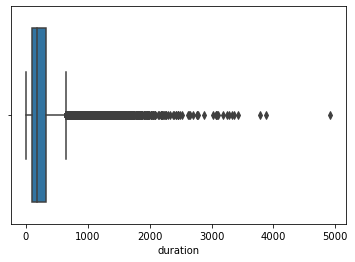

In [246]:
sns.boxplot(x = d1['duration'])

In [247]:
# Calculate the upper and lower limits
print("Old Shape: ", d1.shape)
d1 = pd.read_csv('bank/bank-full.csv', sep=';')
Q1 = d1['duration'].quantile(0.25)
Q3 = d1['duration'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Remove outliers
d1 = d1[d1['duration'] <= upper].reset_index(inplace= False)


# Print the new shape of the DataFrame

print("New Shape: ", d1.shape)

Old Shape:  (45211, 16)
New Shape:  (41976, 18)


<AxesSubplot:xlabel='duration'>

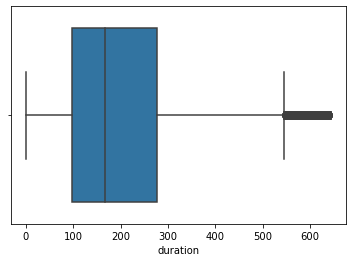

In [248]:
sns.boxplot(x = d1['duration'])

In [249]:
d1 = d1.drop_duplicates()
print("New Shape: ", d1.shape)

New Shape:  (41976, 18)


In [277]:
## output final dataset
d1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,no
